In [1]:
#Skripte laden 
%reload_ext autoreload
%autoreload 2
import os
os.chdir('/home/safiul/email-classification')
import data
from Email_Classification.Functions.packages import *
import Email_Classification.Functions.Functions as fn
import Email_Classification.Functions.parameters as par
#Optionen
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="darkgrid")
param_process = par.params['param_process']
param_nlp = par.params['param_nlp']

In [2]:
#Dateien laden
headers = pd.read_parquet(data.HEADERS_FILE)
bodies = pd.read_parquet(data.BODIES_FILE)
targets = features.zedsets.prepare_target_most_common(
    pd.read_parquet(data.TARGETS_FILE),
    target_column='target_category',
    num_most_common_class=100
)
emails = fn.createDataFrameEmail(headers = headers, 
                                 bodies = bodies, 
                                 targets = targets, 
                                 sample_size = param_process['sample_size'], 
                                 seed = 125)

In [9]:
#berechnet die Anzahl der distinkten Wörter aus allen E-Mail-Korpusse
f  = ' '.join(emails.emails)
f1 = f.split()
f2 = set(f1)
f3 = list(f2)
len(f3)

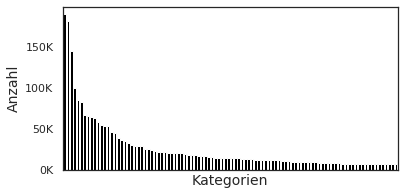

In [78]:
#Grafische Darstellung der Häufigkeit der Kategorien
plt.figure(figsize=(6,3))
plt.rc('axes', labelsize=14) 
sns.set_style("white")
g = sns.countplot(x="target_category", data= emails, color = "black", 
                  order=emails['target_category'].value_counts().sort_values(ascending = False).index)
plt.ylabel('Anzahl')
plt.xlabel('Kategorien')
plt.title('')
plt.xticks([])
ylab = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylab)
plt.savefig('Email_Classification/Explorative Analysis/Figure/Kategorie_Anzahl.pdf', bbox_inches = 'tight',
    pad_inches = 0.02)
plt.show()

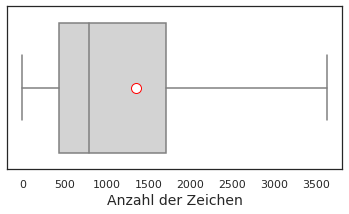

In [103]:
#emails[emails.emails_len ==  1]
#emails.info()
plt.figure(figsize=(6,3))
emails.emails_len.describe()
sns.boxplot(x=emails.emails_len, showfliers = False, color='lightgray', showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"red",'ms': 10})
plt.xlabel('Anzahl der Zeichen')
plt.title('')
plt.savefig('Email_Classification/Explorative Analysis/Figure/character_anzahl.pdf', bbox_inches = 'tight',
    pad_inches = 0.02)
plt.show()

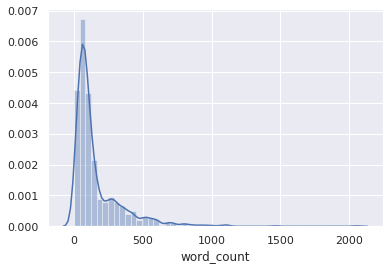

In [7]:
#Verteilung der Anzahl der Wörter
sns.distplot(emails.word_count,kde = True)
plt.show()

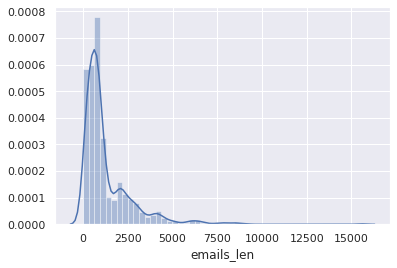

In [8]:
#Verteilung der Länge der Emails
sns.distplot(emails.emails_len,kde = True)
plt.show()

In [116]:
#Wörter und deren Häufigkeit vor und nach  Entfernnung der Stoppwörter
words_freq = fn.get_top_n_words(emails['emails'])
words_freq = pd.DataFrame(words_freq, columns = ['Word' , 'count'])
german_stopwords = stopwords.words('german')
words_freq_AfterstopWrd = fn.get_top_n_words(emails['emails'], stopWords= german_stopwords)
words_freq_AfterstopWrd = pd.DataFrame(words_freq_AfterstopWrd, columns = ['Word' , 'count'])

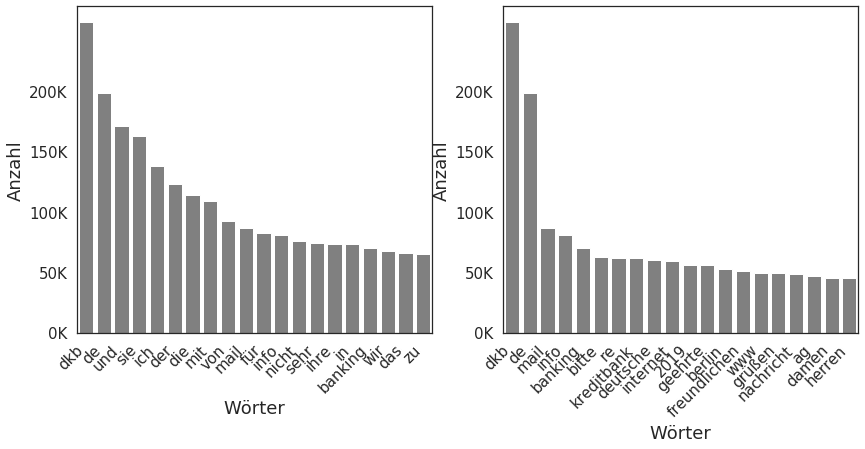

In [161]:
#Count-Plot der Top-N-Wörter vor der Entfernnung der Stoppwörter
plt.rc('axes', labelsize=18)
sns.set_style("white")
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
fig = sns.barplot(x = "Word", y = "count", data = words_freq.iloc[:20], color = "gray")
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y')
ylab = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
fig.set_yticklabels(ylab)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Wörter')
plt.ylabel('Anzahl')

plt.subplot(1, 2, 2)
fig = sns.barplot(x = "Word", y = "count", data = words_freq_AfterstopWrd.iloc[:20], color = "gray")
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y')
ylab = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
fig.set_yticklabels(ylab)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Wörter')
plt.ylabel('Anzahl')

plt.savefig('Email_Classification/Explorative Analysis/Figure/word_count.pdf', bbox_inches = 'tight',
    pad_inches = 0.02)
plt.show()